# Gantt Charts

## X-ray and Gamma-ray Observatories over time

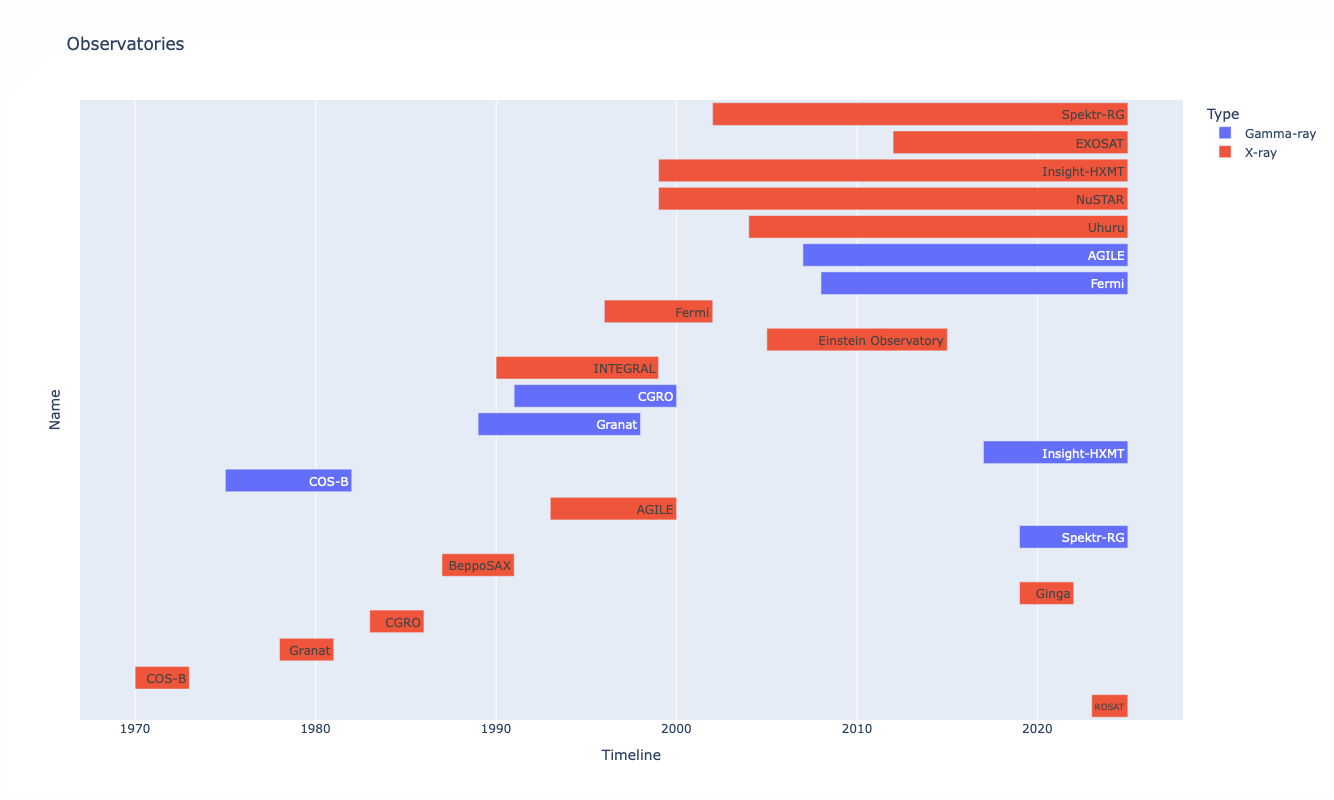

In [44]:
import plotly.express as px
import pandas as pd
from datetime import datetime

# Define tasks with start/end dates and types
data = [
    {"Name": "COS-B", "Launch Date": 1975, "End Date": 1982, "Lifespan": "7 years", "Type": "Gamma-ray"},
    {"Name": "Granat", "Launch Date": 1989, "End Date": 1998, "Lifespan": "9 years", "Type": "Gamma-ray"},
    {"Name": "CGRO", "Launch Date": 1991, "End Date": 2000, "Lifespan": "9 years", "Type": "Gamma-ray"},# CGRO (Compton Gamma Ray Observatory)
    {"Name": "BeppoSAX", "Launch Date": 1996, "End Date": 2002, "Lifespan": "6 years", "Type": "Gamma-ray"},
    {"Name": "INTEGRAL", "Launch Date": 2002, "End Date": "Present", "Lifespan": "Operational (over 20 years)", "Type": "Gamma-ray"},
    {"Name": "AGILE", "Launch Date": 2007, "End Date": "Present", "Lifespan": "Operational (over 17 years)", "Type": "Gamma-ray"},
    {"Name": "Fermi", "Launch Date": 2008, "End Date": "Present", "Lifespan": "Operational (over 16 years)", "Type": "Gamma-ray"},# Fermi Gamma-ray Space Telescope
    {"Name": "NuSTAR", "Launch Date": 2012, "End Date": "Present", "Lifespan": "Operational (over 12 years)", "Type": "Gamma-ray"},
    {"Name": "Insight-HXMT", "Launch Date": 2017, "End Date": "Present", "Lifespan": "Operational (over 6 years)", "Type": "Gamma-ray"},
    {"Name": "Spektr-RG", "Launch Date": 2019, "End Date": "Present", "Lifespan": "Operational (over 4 years)", "Type": "Gamma-ray"},
    
    {"Name": "Uhuru", "Launch Date": 1970, "End Date": 1973, "Lifespan": "3 years", "Type": "X-ray"},
    {"Name": "Einstein Observatory", "Launch Date": 1978, "End Date": 1981, "Lifespan": "2.5 years", "Type": "X-ray"},
    {"Name": "EXOSAT", "Launch Date": 1983, "End Date": 1986, "Lifespan": "3 years", "Type": "X-ray"},
    {"Name": "Ginga", "Launch Date": 1987, "End Date": 1991, "Lifespan": "4 years", "Type": "X-ray"},
    {"Name": "ROSAT", "Launch Date": 1990, "End Date": 1999, "Lifespan": "9 years", "Type": "X-ray"},
    {"Name": "ASCA", "Launch Date": 1993, "End Date": 2000, "Lifespan": "7 years", "Type": "X-ray"},
    {"Name": "BeppoSAX", "Launch Date": 1996, "End Date": 2002, "Lifespan": "6 years", "Type": "X-ray"},
    {"Name": "Chandra", "Launch Date": 1999, "End Date": "Present", "Lifespan": "Operational (over 20 years)", "Type": "X-ray"},
    {"Name": "XMM-Newton", "Launch Date": 1999, "End Date": "Present", "Lifespan": "Operational (over 20 years)", "Type": "X-ray"},
    {"Name": "INTEGRAL", "Launch Date": 2002, "End Date": "Present", "Lifespan": "Operational (over 20 years)", "Type": "X-ray"},
    {"Name": "Swift", "Launch Date": 2004, "End Date": "Present", "Lifespan": "Operational (over 19 years)", "Type": "X-ray"},
    {"Name": "Suzaku", "Launch Date": 2005, "End Date": 2015, "Lifespan": "10 years", "Type": "X-ray"},
    {"Name": "NuSTAR", "Launch Date": 2012, "End Date": "Present", "Lifespan": "Operational (over 12 years)", "Type": "X-ray"},
    {"Name": "eROSITA", "Launch Date": 2019, "End Date": "Suspended", "Lifespan": "3 years (suspended due to conflict)", "Type": "X-ray"},
    {"Name": "XRISM", "Launch Date": 2023, "End Date": "Present", "Lifespan": "Operational (planned for ~3 years)", "Type": "X-ray"}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Replace "Present" and "Suspended" end dates with an approximate date for visualization
current_year = datetime.now().year
df['End Date'] = df['End Date'].replace("Present", current_year)
df['End Date'] = df['End Date'].replace("Suspended", 2022)  # or any other relevant year for "Suspended" state

# Convert years to datetime (setting to Jan 1 of each year)
df['Launch Date'] = pd.to_datetime(df['Launch Date'], format='%Y')
df['End Date'] = pd.to_datetime(df['End Date'], format='%Y')

# Create Gantt chart with color based on "Type"
fig = px.timeline(df, x_start="Launch Date", x_end="End Date", y="Name", color="Type", title="Observatories")

# Customize layout to show names inside the bars
fig.update_yaxes(categoryorder="total ascending")  # Order tasks
fig.update_xaxes(title="Timeline")
fig.update_layout(showlegend=True)

# Add task names inside the bars
fig.update_traces(text=df['Name'], textposition="inside")

# Set the layout size in pixels
fig.update_layout(
    width=1200,  # Increase width
    height=800,  # Increase height
    showlegend=True,
    title="Observatories"
)
fig.update_yaxes(showticklabels=False)

fig.show()

# X-ray and $\gamma$-ray Observatories
Data from: https://en.wikipedia.org/wiki/List_of_space_telescopes &
https://en.wikipedia.org/wiki/List_of_proposed_space_telescopes &
https://heasarc.gsfc.nasa.gov/docs/heasarc/missions/upcoming.html

### Convert excel (html) tables into csv

In [221]:
# DON'T RUN THIS CELL: CSV HAVE BEEN CHANGED MANUALLY TO WORK PROPERLY
import pandas as pd
import xlwings as xw

def excel_to_csv(excel_file, sheet_name, csv_file):
    # Open the Excel file
    with xw.App(visible=False) as app:
        workbook = app.books.open(excel_file)
        
        # Select the specified sheet
        sheet = workbook.sheets[sheet_name]
        
        # Read all the used data into a pandas DataFrame
        data = sheet.used_range.options(pd.DataFrame, header=1, index=False).value
        
        # Save the DataFrame to a CSV file
        data.to_csv(csv_file, index=False)
        
        # Close the workbook
        workbook.close()

# Example usage
excel_file_path = 'gamma-ray-obs.xlsx'  # Replace with your Excel file path
sheet_name = 'Sheet1'  # Replace with your desired sheet name
csv_file_path = 'gamma-ray-obs.csv'  # Replace with your desired output CSV file path

# excel_to_csv(excel_file_path, sheet_name, csv_file_path)

KeyboardInterrupt: 

# Create Gantt Chart

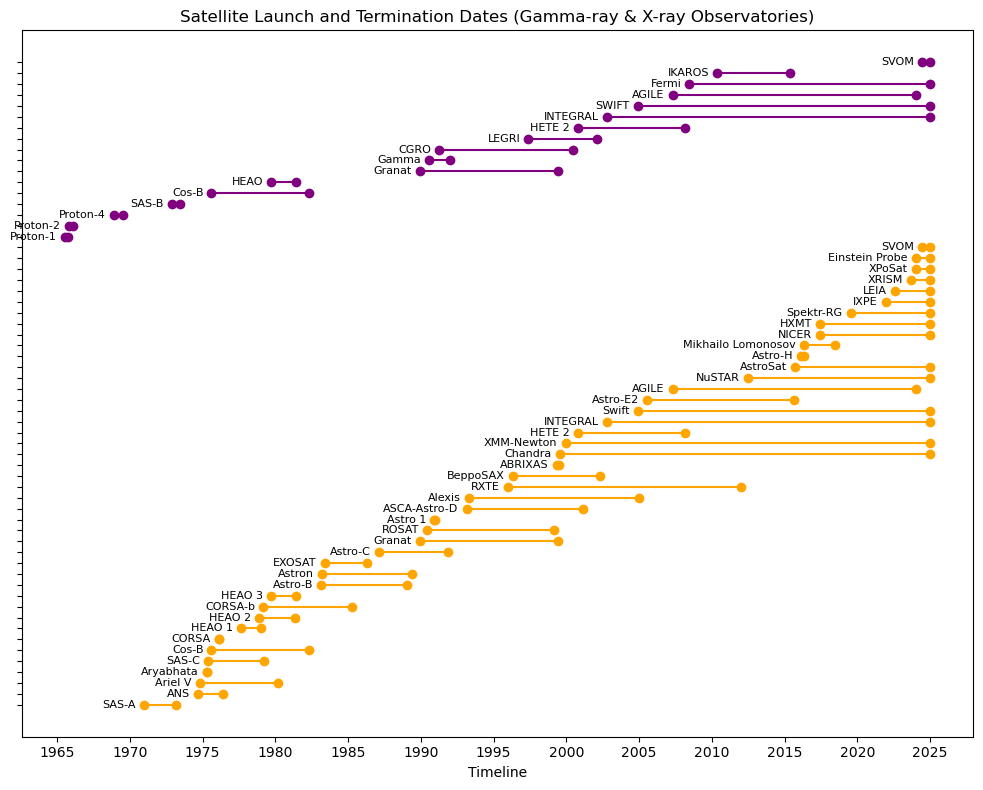

In [49]:
# importing requirements
import pandas as pd
from datetime import datetime, timedelta
from astropy.time import Time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# read data
x_ray_obs = pd.read_csv('x-ray-obs.csv')
gamma_ray_obs = pd.read_csv('gamma-ray-obs.csv')
data = pd.concat([x_ray_obs, gamma_ray_obs], ignore_index=True)

# setting unknown mission termination to current time
data['Terminated'] = data['Terminated'].replace("01/01/2001", "01/01/2025")

# formating dates to iso
for index, row in data.iterrows():
    launch = str(data.at[index, 'Launch date']).split("/")
    data.at[index, 'Launch date'] = launch[2] +'-' + launch[1] + '-' + launch[0]
    end = str(data.at[index, 'Terminated']).split("/")
    data.at[index, 'Terminated'] = end[2] + '-' + end[1] + '-' + end[0]

# converting time to datetime objects
for index, row in data.iterrows():
    time = Time(data.at[index, 'Launch date'], format='iso', scale='utc') # create astropy.time object
    data.at[index, 'Launch date'] = time.to_datetime()
    
    time = Time(data.at[index, 'Terminated'], format='iso', scale='utc') # create astropy.time object
    data.at[index, 'Terminated'] = time.to_datetime()

# Configuring colors
data.loc[data['Type']=='X-ray', 'Color'] = 'orange'
data.loc[data['Type']=='Gamma-ray', 'Color'] = 'purple'

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 8))

for i, row in data.iterrows():
    ax.plot([row['Launch date'], row['Terminated']], [i, i], marker='o', color=row['Color'])
    ax.text(row['Launch date'] - timedelta(days=200), i, row['Name'], verticalalignment='center', horizontalalignment='right', fontsize=8)

# Setting labels and title
ax.set_yticks(range(len(data)))
ax.set_yticklabels(data['Name'])
ax.set_xlabel('Timeline')
ax.set_title('Satellite Launch and Termination Dates (Gamma-ray & X-ray Observatories)')

# Formatting the date axis
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

types = data['Type'].unique()
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

# Future X-ray and $\gamma$-ray Observatories

/Users/joanalnu/opt/anaconda3/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/joanalnu/opt/anaconda3/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"



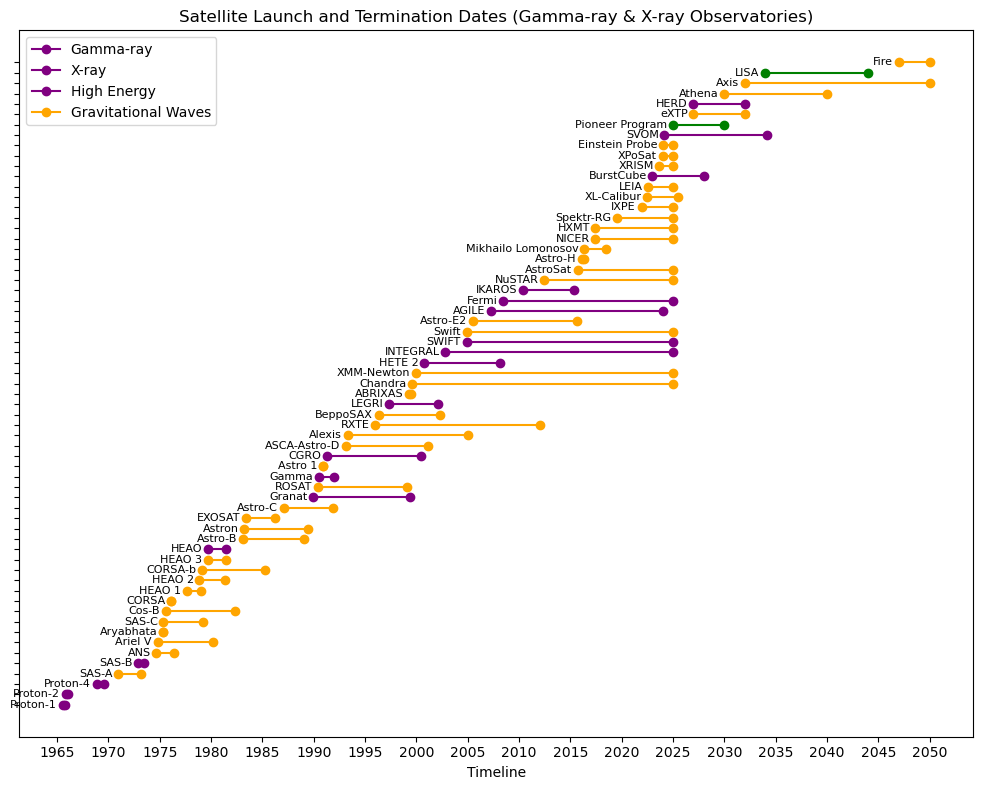

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from astropy.time import Time

# Get new data
future = [
    {"Name":"Axis", "Space agency":"NASA", "Launch date":"01-01-2032", "Terminated":"01-01-2050", "Location":"Low Earth Orbit", "Ref(s)":"[9]", "Type": "X-ray", "Full Name": "AXIS (Advanced X-Ray Imaging Satellite)"},
    {"Name":"Fire", "Space agency":"NASA", "Launch date":"01-01-2047", "Terminated":"01-01-2050", "Location":"possibly Sun-Earth L2 Lagrange point", "Ref(s)":"[14]", "Type":"X-ray", "Full Name": "X-Ray Great Observatory (nicknamed Fire)"}
]
future_df = pd.DataFrame(future)

missions_data = [
    {"Name": "Athena","Space agency": "ESA/NASA","Launch date": "01-01-2030","Terminated": "01-01-2040","Location": "Earth-Sun L2 Point","Ref(s)": "[1]","Type": "X-ray","Full Name": "Athena (Advanced Telescope for High Energy Astrophysics)"},
    {"Name": "BurstCube","Space agency": "NASA","Launch date": "01-01-2023","Terminated": "01-01-2028","Location": "Low Earth Orbit","Ref(s)": "[2]","Type": "Gamma-ray","Full Name": "BurstCube"},
    {"Name": "eXTP","Space agency": "China/European Institution","Launch date": "01-01-2027","Terminated": "01-01-2032","Location": "Low Earth Orbit","Ref(s)": "[3]","Type": "X-ray","Full Name": "enhanced X-ray Timing and Polarimetry Mission"},
    {"Name": "HERD","Space agency": "China","Launch date": "01-01-2027","Terminated": "01-01-2032","Location": "China’s Space Station","Ref(s)": "[4]","Type": "Gamma-ray","Full Name": "High Energy Radiation Detection"},
    {"Name": "LISA","Space agency": "ESA/NASA","Launch date": "01-01-2034","Terminated": "01-01-2044","Location": "Solar Orbit","Ref(s)": "[5]","Type": "Gravitational Waves","Full Name": "Laser Interferometer Space Antenna"},
    {"Name": "Pioneer Program","Space agency": "NASA","Launch date": "01-01-2025","Terminated": "01-01-2030","Location": "Varied","Ref(s)": "[6]","Type": "High Energy","Full Name": "Pioneer Program: High Energy Missions"},
    {"Name": "SVOM","Space agency": "Sino-French","Launch date": "01-03-2024","Terminated": "01-03-2034","Location": "Low Earth Orbit","Ref(s)": "[7]","Type": "Gamma-ray","Full Name": "Space-based astronomical Variable Object Monitor"},
    {"Name": "XL-Calibur","Space agency": "NASA","Launch date": "01-07-2022","Terminated": "01-07-2025","Location": "Near Earth","Ref(s)": "[8]","Type": "X-ray","Full Name": "XL-Calibur"},
]
missions_df = pd.DataFrame(missions_data)

new_data = pd.concat([future_df, missions_df], ignore_index=True)

# formating dates to iso
for index, row in new_data.iterrows():
    launch = str(new_data.at[index, 'Launch date']).split("-")
    new_data.at[index, 'Launch date'] = launch[2] +'-' + launch[1] + '-' + launch[0]
    end = str(new_data.at[index, 'Terminated']).split("-")
    new_data.at[index, 'Terminated'] = end[2] + '-' + end[1] + '-' + end[0]

# converting time to datetime objects
for index, row in new_data.iterrows():
    time = Time(new_data.at[index, 'Launch date'], format='iso', scale='utc') # create astropy.time object
    new_data.at[index, 'Launch date'] = time.to_datetime()
    
    time = Time(new_data.at[index, 'Terminated'], format='iso', scale='utc') # create astropy.time object
    new_data.at[index, 'Terminated'] = time.to_datetime()

# Configuring colors
new_data.loc[new_data['Type']=='X-ray', 'Color'] = 'orange'
new_data.loc[new_data['Type']=='Gamma-ray', 'Color'] = 'purple'
new_data.loc[new_data['Type']=='Gravitational Waves', 'Color'] = 'green'
new_data.loc[new_data['Type']=='High Energy', 'Color'] = 'green'


# Joining datasets
complete_data = pd.concat([data, new_data], ignore_index=True)

# Sort new_data by 'Launch date'
complete_data = complete_data.sort_values(by='Launch date').reset_index(drop=True)

# Remove duplicates based on 'Name'
complete_data = complete_data.drop_duplicates(subset='Name', keep='first').reset_index(drop=True)

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 8))

for i, row in complete_data.iterrows():
    ax.plot([row['Launch date'], row['Terminated']], [i, i], marker='o', color=row['Color'])
    ax.text(row['Launch date'] - timedelta(days=200), i, row['Name'], verticalalignment='center', horizontalalignment='right', fontsize=8)

# Setting labels and title
ax.set_yticks(range(len(complete_data)))
ax.set_yticklabels(complete_data['Name'])
ax.set_xlabel('Timeline')
ax.set_title('Satellite Launch and Termination Dates (Gamma-ray & X-ray Observatories)')

# Formatting the date axis
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

types = complete_data['Type'].unique()
plt.legend(labels=types)
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

#import os
#fig.savefig(os.path.dirname(os.path.abspath(__doc__))+'/observatory_timelines.png', dpi=600)

# Wavelength Observation Range Capability
(for the coming 10 years)

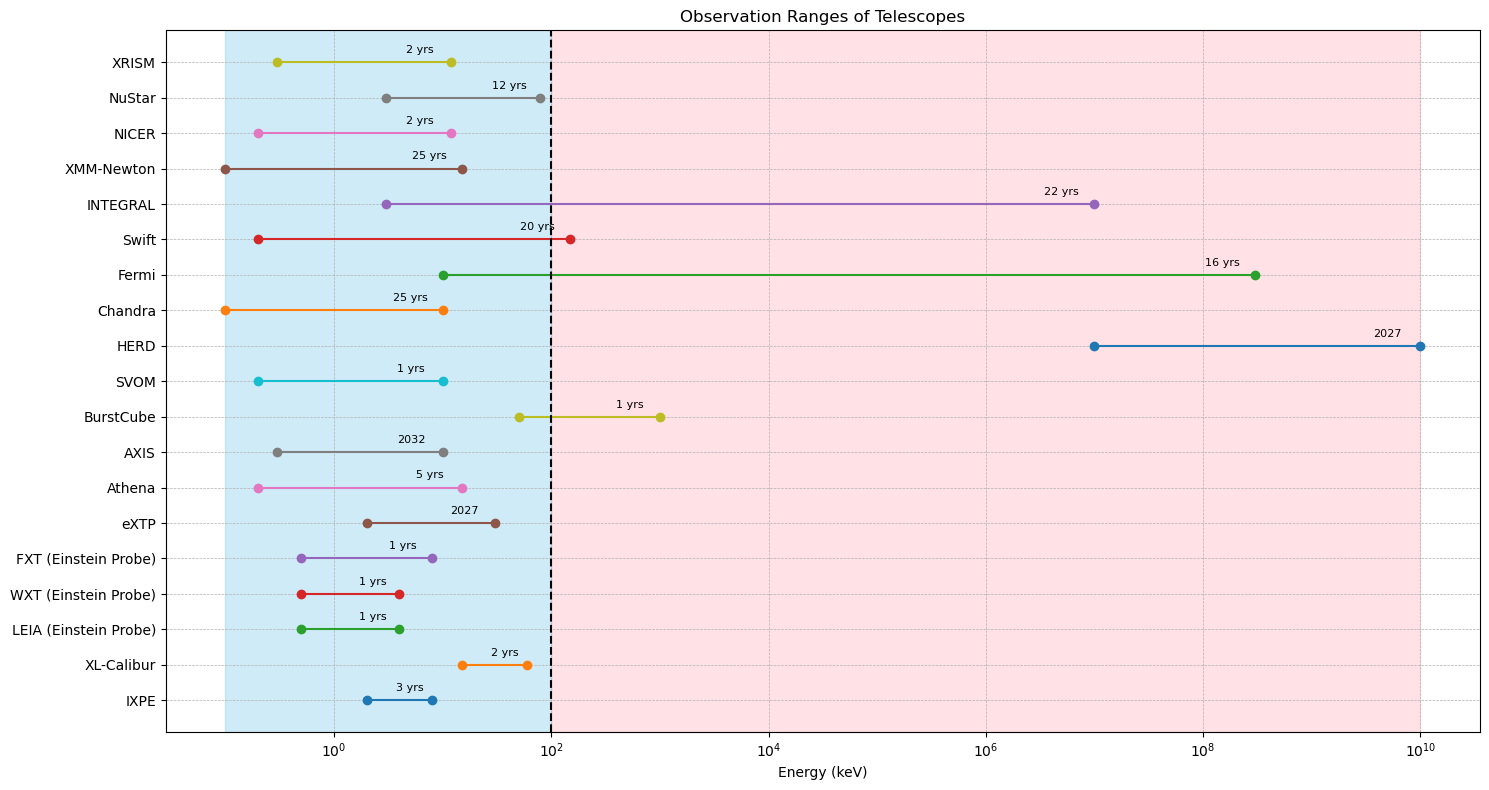

In [55]:
import matplotlib.pyplot as plt

# Define telescope data with ages (in years)
telescopes = [
    ('IXPE', (2, 8), 3),  # Age in years
    ('XL-Calibur', (15, 60), 2),
    ('LEIA (Einstein Probe)', (0.5, 4), 1),
    ('WXT (Einstein Probe)', (0.5, 4), 1),
    ('FXT (Einstein Probe)', (0.5, 8), 1),
    ('eXTP', (2, 30), 2027),
    ('Athena', (0.2, 15), 5),
    ('AXIS', (0.3, 10), 2032),
    ('BurstCube', (50, 1000), 1),
    ('SVOM', (0.2, 10), 1),
    ('HERD', (10000000, 10000000000), 2027),
    ('Chandra', (0.1, 10), 25),
    ('Fermi', (10, 300000000), 16),
    ('Swift', (0.2, 150), 20),
    ('INTEGRAL', (3, 10000000), 22),
    ('XMM-Newton', (0.1, 15), 25),
    ('NICER', (0.2, 12), 2),
    ('NuStar', (3, 79), 12),
    ('XRISM', (0.3, 12), 2),
]

# Prepare data for plotting
names = [telescope[0] for telescope in telescopes]
ranges = [telescope[1] for telescope in telescopes]
ages = [telescope[2] for telescope in telescopes]

# Create plot
fig, ax = plt.subplots(figsize=(15, 8))

for i, (name, (start, end), age) in enumerate(zip(names, ranges, ages)):
    ax.plot([start, end], [i, i], marker='o', label=name)
    # Add age text above each line
    if str(age)[:2] == '20' and len(str(age))>2:
        ax.text((start + end) / 2, i + 0.2, f'{age}', ha='center', va='bottom', fontsize=8)
    else:
        ax.text((start + end) / 2, i + 0.2, f'{age} yrs', ha='center', va='bottom', fontsize=8)     
    

# Dividing x-ray from gamma-ray
ax.axvline(x=100, color='black', linestyle='--')
ax.axvspan(xmin=0.1, xmax=100, color='skyblue', alpha=0.4)
ax.axvspan(xmin=100, xmax=10000000000, color='lightpink', alpha=0.4)

# Customize the plot
ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)
ax.set_xscale('log')  # Log scale for energy
ax.set_xlabel('Energy (keV)')
ax.set_title('Observation Ranges of Telescopes')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.1)

# Show plot
plt.tight_layout()
plt.show()
fig.savefig('observation_ranges.png', dpi=600)

## General plot

In [39]:
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf",  # Cyan
    "#f5a623",  # Warm Yellow
    "#ff5733",  # Bright Red-Orange
    "#44af69",  # Teal
    "#dbdb8d",  # Pale Yellow-Green
    "#c70039",  # Deep Red
    "#900c3f",  # Dark Burgundy
    "#6f42c1",  # Royal Purple
    "#00a896",  # Turquoise
    "#f3722c",  # Vivid Orange
    "#ffcc00",  # Bright Golden Yellow
]

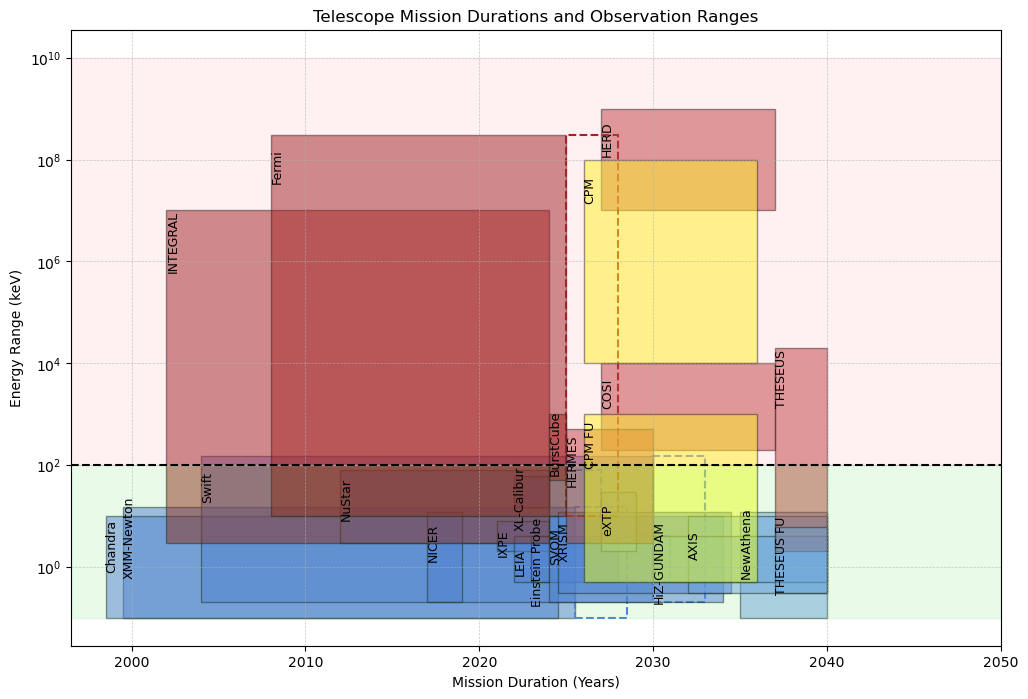

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define telescope data (including extensions)
telescopes = [
    # name, (low_energy, high_energy), age, launch year, extension possibility
    # X-ray
    ('XMM-Newton', (0.1, 15), 26, 1999.5, 'y', 'current_xray'),
    ('Chandra', (0.1, 10), 26, 1998.5, 'n', 'current_xray'),
    ('Swift', (0.2, 150), 26, 2004, 'y', 'current_xray'),
    ('NuStar', (3, 79), 12, 2012, 'y', 'current_xray'),
    ('NICER', (0.2, 12), 2, 2017, 'n', 'current_xray'),
    ('IXPE', (2, 8), 3, 2021, 'n', 'current_xray'),
    ('XL-Calibur', (15, 60), 2, 2022, 'n', 'current_xray'),
    ('LEIA', (0.5, 4), 2, 2022, 'n', 'current_xray'),
    ('Einstein Probe', (0.5, 4), 5, 2023, 'y', 'current_xray'),
    ('SVOM', (4, 5000), 10, 2024, 'n', 'current_xray'), # has a GRB monitoring instrument in 15-5000 keV range
    ('XRISM', (0.3, 12), 10, 2024.5, 'n', 'current_xray'),

    # current gamma-ray
    ('INTEGRAL', (3, 10000000), 22, 2002, 'n', 'current_gamma'),
    ('Fermi', (10, 300000000), 17, 2008, 'y', 'current_gamma'),
    ('BurstCube', (50, 1000), 1, 2024, 'n', 'current_gamma'),

    #future X-ray
    ('eXTP', (2, 30), 2, 2027, 'n', 'future_xray'),
    ('NewAthena', (0.1, 12), 5, 2035, 'n', 'future_xray'),
    ('AXIS', (0.3, 10), 8, 2032, 'n', 'future_xray'),
    ('HiZ-GUNDAM', (0.5, 4), 10, 2030, 'n', 'future_xray'), # also having a built-in IR follow-up telescope

    # future gamma-ray
    ('HERD', (10000000, 1000000000), 10, 2027, 'n', 'future_gamma'),
    ('COSI', (200, 10000), 10, 2027, 'n', 'future_gamma'),
    ('THESEUS', (2, 20000), 3, 2037, 'n', 'future_gamma'), # this is also setted to observe @ X-ray (0.3-6 KeV) and Infrared (see THESEUS FU)
    ('THESEUS FU', (0.3, 6), 3, 2037, 'n', 'future_xray'),
    ('HERMES', (3, 500), 5, 2025, 'n', 'future_gamma'),

    # CAPIBARA
    #('CAPIBARA', (1, 10000000), 10, 2026, 'n', 'diamant')
    ('CPM', (10000, 10**8), 10, 2026, 'n', 'diamant'),
    ('CPM FU', (0.5, 1000), 10, 2026, 'n', 'diamant')
]

# Extract data
names = [t[0] for t in telescopes]
ranges = [t[1] for t in telescopes]
lifetimes = [t[2] for t in telescopes]
launch_years = [t[3] for t in telescopes]
extensions = [t[4] for t in telescopes]  # Default 'n' if missing
obstypes = [t[5] for t in telescopes]

# Compute end-of-mission years
end_years = [launch + lifetime for launch, lifetime in zip(launch_years, lifetimes)]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors
colors = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "diamant": "yellow"
}

# Plot mission lifetimes as rectanges
for i, (name, (start, end), launch, end_mission, ext, obstype) in enumerate(zip(names, ranges, launch_years, end_years, extensions, obstypes)):    
    color = colors["current_xray"] if start < 10 else colors["current_gamma"]
    if launch > 2024:
        color = colors["future_xray"] if start < 10 else colors["future_gamma"]

    # Main mission rectangle
    rect = patches.Rectangle((launch, start), end_mission - launch, end - start, 
                             facecolor=colors[obstype],
                             alpha=0.5, edgecolor="black", linewidth=1)
    ax.add_patch(rect)

    # Handle mission extensions
    ext_length = 0
    if ext == 'y': # Potential extension
        ext_length = 3
        ext_style = {'facecolor': 'none', 'edgecolor': color, 'linestyle': '--', 'linewidth': 1.5}  # Dashed outline
    
    if ext_length > 0:
        ext_rect = patches.Rectangle((end_mission, start), ext_length, end - start, **ext_style)
        ax.add_patch(ext_rect)

    # Add mission label
    ax.text(launch, (start+(end/2))/2, name, ha="left", va="center", fontsize=9, color="black", rotation='vertical')

# Set axis labels and title
ax.set_xlabel("Mission Duration (Years)")
ax.set_ylabel("Energy Range (keV)")
ax.set_title("Telescope Mission Durations and Observation Ranges")

# Log scale for energy range
ax.set_yscale("log")

# Add X-ray/gamma-ray division
ax.axhline(y=100, color='black', linestyle='--')
ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2)
ax.axhspan(ymin=100, ymax=10000000000, color='lightpink', alpha=0.2)

# Year range
ax.set_xlim(min(launch_years) - 2, max(end_years) + 10)

# Grid and style
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Show plot
plt.show()
fig.savefig('time_energy.png', dpi=600)

In order to perform intensity interferometry, we must have a fleet of gamma-ray/X-ray monitoring satellites online. Until 2025 we did have:
* Swift
* FERMI
* INTEGRAL

However, INTEGRAL was shut down in March 2025, and both FERMI and Swift will face both aging and financial issues, continued observations are not granted. In the context of this panorama, space agencies are preparing future missions, these are:
* COSI
* THESEUS
* HERD
* HERMES

The aim of CAPIBARA is to provide a further GRB monitoring satellite for the sake of intensity interferomtry. Complying this goal we are setting a dual observation range, where we will focus on HE gamma-rays and soft X-ray observations: 1 MeV to 1000 MeV and 0.1-1000 keV

High-z GRB are best observed in the 1 keV to 10 MeV region. However, we are also willing to connect the 

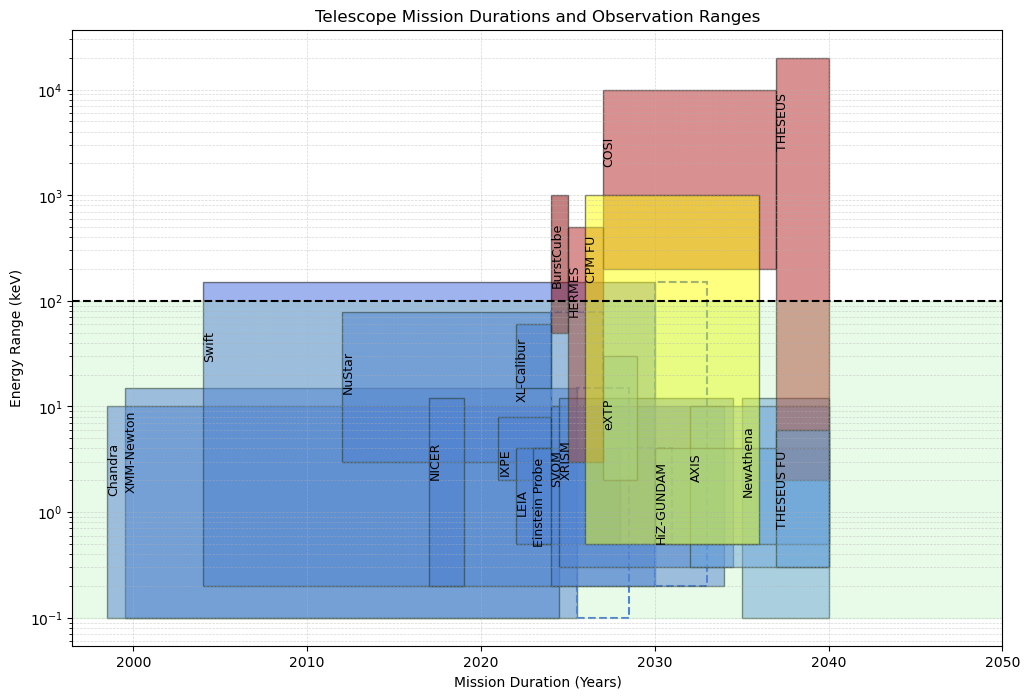

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define telescope data (including extensions)
telescopes = [
    # name, (low_energy, high_energy), age, launch year, extension possibility
    # X-ray
    ('XMM-Newton', (0.1, 15), 26, 1999.5, 'y', 'current_xray'),
    ('Chandra', (0.1, 10), 26, 1998.5, 'n', 'current_xray'),
    ('Swift', (0.2, 150), 26, 2004, 'y', 'current_xray'),
    ('NuStar', (3, 79), 12, 2012, 'y', 'current_xray'),
    ('NICER', (0.2, 12), 2, 2017, 'n', 'current_xray'),
    ('IXPE', (2, 8), 3, 2021, 'n', 'current_xray'),
    ('XL-Calibur', (15, 60), 2, 2022, 'n', 'current_xray'),
    ('LEIA', (0.5, 4), 2, 2022, 'n', 'current_xray'),
    ('Einstein Probe', (0.5, 4), 5, 2023, 'y', 'current_xray'),
    ('SVOM', (4, 5000), 10, 2024, 'n', 'current_xray'), # has a GRB monitoring instrument in 15-5000 keV range
    ('XRISM', (0.3, 12), 10, 2024.5, 'n', 'current_xray'),

    # current gamma-ray
    # ('INTEGRAL', (3, 10000000), 22, 2002, 'n', 'current_gamma'),
    # ('Fermi', (10, 300000000), 17, 2008, 'y', 'current_gamma'),
    ('BurstCube', (50, 1000), 1, 2024, 'n', 'current_gamma'),

    #future X-ray
    ('eXTP', (2, 30), 2, 2027, 'n', 'future_xray'),
    ('NewAthena', (0.1, 12), 5, 2035, 'n', 'future_xray'),
    ('AXIS', (0.3, 10), 8, 2032, 'n', 'future_xray'),
    ('HiZ-GUNDAM', (0.5, 4), 10, 2030, 'n', 'future_xray'), # also having a built-in IR follow-up telescope

    # future gamma-ray
    # ('HERD', (10000000, 1000000000), 10, 2027, 'n', 'future_gamma'),
    ('COSI', (200, 10000), 10, 2027, 'n', 'future_gamma'),
    ('THESEUS', (2, 20000), 3, 2037, 'n', 'future_gamma'), # this is also setted to observe @ X-ray (0.3-6 KeV) and Infrared (see THESEUS FU)
    ('THESEUS FU', (0.3, 6), 3, 2037, 'n', 'future_xray'),
    ('HERMES', (3, 500), 2, 2025, 'n', 'future_gamma'),

    # CAPIBARA
    # ('CAPIBARA', (1, 10000000), 10, 2026, 'n', 'diamant')
    # ('CPM', (10000, 10**8), 10, 2026, 'n', 'diamant'),
    ('CPM FU', (0.5, 1000), 10, 2026, 'n', 'diamant')
]

# Extract data
names = [t[0] for t in telescopes]
ranges = [t[1] for t in telescopes]
lifetimes = [t[2] for t in telescopes]
launch_years = [t[3] for t in telescopes]
extensions = [t[4] for t in telescopes]  # Default 'n' if missing
obstypes = [t[5] for t in telescopes]

# Compute end-of-mission years
end_years = [launch + lifetime for launch, lifetime in zip(launch_years, lifetimes)]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors
colors = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "diamant": "yellow"
}

# Plot mission lifetimes as rectanges
for i, (name, (start, end), launch, end_mission, ext, obstype) in enumerate(zip(names, ranges, launch_years, end_years, extensions, obstypes)):    
    color = colors["current_xray"] if start < 10 else colors["current_gamma"]
    if launch > 2024:
        color = colors["future_xray"] if start < 10 else colors["future_gamma"]

    # Main mission rectangle
    rect = patches.Rectangle((launch, start), end_mission - launch, end - start, 
                             facecolor=colors[obstype],
                             alpha=0.5, edgecolor="black", linewidth=1)
    ax.add_patch(rect)

    # Handle mission extensions
    ext_length = 0
    if ext == 'y': # Potential extension
        ext_length = 3
        ext_style = {'facecolor': 'none', 'edgecolor': color, 'linestyle': '--', 'linewidth': 1.5}  # Dashed outline
    
    if ext_length > 0:
        ext_rect = patches.Rectangle((end_mission, start), ext_length, end - start, **ext_style)
        ax.add_patch(ext_rect)

    # Add mission label
    ax.text(launch, (start+(end/2))/2, name, ha="left", va="center", fontsize=9, color="black", rotation='vertical')

# Set axis labels and title
ax.set_xlabel("Mission Duration (Years)")
ax.set_ylabel("Energy Range (keV)")
ax.set_title("Telescope Mission Durations and Observation Ranges")

# Log scale for energy range
ax.set_yscale("log")

# Add X-ray/gamma-ray division
ax.axhline(y=100, color='black', linestyle='--')
ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2)
#ax.axhspan(ymin=100, ymax=10000000000, color='lightpink', alpha=0.2)

# Year range
ax.set_xlim(min(launch_years) - 2, max(end_years) + 10)

# Grid and style
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

# Show plot
plt.show()
fig.savefig('time_energy.png', dpi=600)

Strategically, the goal of CPM (CAPIBARA Photonic Mission) is to fill in the gap between the HERD mission and the COSI mission (in the gamma-ray part of the spectrum), substituting the monitoring of FERMI and INTEGRAL. Whereas our X-ray part would match the observations of COSI and HiZ-GUNDAM (togethert with other observatories like SVOM and Einstein Probe) for X-ray GRB monitoring before THESEUS comes. Additionlly, not only enabling continous observations after HERMES it will also provide platform for intensity interferometry in this bands.